# The Analysis of Berlin  Marathon

- 喜欢跑步, 所以选择了这个分析方向
- 由于数据不足, 脑洞太小, 所以目前只做了很简单的分析.
- 希望未来有更充足的数据, 不同的马拉松比赛的数据, 以及分类更详实的数据!

In [593]:
%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
import numpy as np
import seaborn as sns
import pandas as pd

In [103]:
import glob

In [353]:
from scipy import stats

In [449]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.graphics.api as smg

## 整合2005~2014数据

In [146]:
path = r"/Users/xpgeng/Project/Marathon_Analysis/data"

In [147]:
allfiles = glob.glob(path + "/*.csv")

In [150]:
frame = pd.DataFrame()
list_ = []
for file_ in allfiles:
    df = pd.read_csv(file_,index_col=None, header=0)
    list_.append(df)
frame = pd.concat(list_)

In [154]:
df = frame

In [156]:
df.head(10)

,place,netTime,clockTime,yob,ageClass,acPlace,sex,nationality,name,yearOfRun
0,1,7661,7661,1978,20,1,M,KEN,354658649da56c20c72b6689d2b7e1b8cc334ac9,2005
1,2,7738,7738,1976,20,2,M,KEN,1da607e762ac07eba6f9b5a717e9ff196d987242,2005
2,3,7747,7747,1978,20,3,M,KEN,1de4a95cef28c290ba5790217288f510afc3b26b,2005
3,4,7750,7750,1973,30,1,M,KEN,12215d93d2cb5b0234991a64d097955338a73dd3,2005
4,5,7810,7810,1975,30,2,M,KEN,5375986567be20b49067956e989884908fb807f6,2005
5,6,7811,7811,1982,20,4,M,ETH,613be609b3f4a38834c2bc35bffbdb6c47418666,2005
6,7,7853,7853,1982,20,5,M,KEN,70fb3284d112dc27a5cad7f705b38bc91f56ecad,2005
7,8,7902,7902,1973,30,3,M,AUS,0ea5d606a83eb68c89da0a98543b815e383835e3,2005
8,9,7923,7923,1977,20,6,M,BRA,ecdd57df778ad901b41e79dd2713a23cb8f13860,2005
9,10,7927,7927,1982,20,7,M,ETH,ae7fe893268d86b7a1bdb4489f9a0798797c718c,2005


## 历年精英跑者分析(Top100)


In [169]:
df_top100 = pd.DataFrame({"Year": range(2005,2015), "MeanofRate": "", "MaxRate": ""}, index = range(2005, 2015))

In [181]:
for i in range(2005, 2015):
    df_top100["MeanofRate"][i] = df[df.yearOfRun == i].head(100).netTime.mean()/60
    df_top100["MaxRate"][i] = df[df.yearOfRun == i].head(100).netTime.min()/60

/Users/xpgeng/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/Users/xpgeng/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [200]:
df_top100 = df_top100.rename(columns={"man":"male"})

In [202]:
df_top100["female"] = ""

In [204]:
for i in range(2005, 2015):
    df_top100.male[i] = df[df.yearOfRun == i].head(100).sex.value_counts()[0]
    df_top100.female[i] = df[df.yearOfRun == i].head(100).sex.value_counts()[1]

/Users/xpgeng/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/Users/xpgeng/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [206]:
df_top100["MaxRateofFemale"] = ""

In [209]:
for i in range(2005, 2015):
    df_top100.MaxRateofFemale[i] = df[df.yearOfRun == i].head(100)[df[df.yearOfRun == i].head(100).sex=="W"].netTime.min()/60

/Users/xpgeng/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [212]:
df_top100 = df_top100.rename(columns={"MaxRate":"MaxRateofMale"})

In [214]:
df_top100["Pace"] = ""

In [215]:
df_top100["Pace"] = df_top100.MeanofRate/42.195

In [217]:
df_top100["NationalityCounts"] = ""
for i in range(2005, 2015):
    df_top100.NationalityCounts[i] = df[df.yearOfRun == i].head(100).nationality.value_counts()

/Users/xpgeng/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [221]:
df_top100["AgeClassCounts"] = ""
for i in range(2005, 2015):
    df_top100.AgeClassCounts[i] = df[df.yearOfRun == i].head(100).ageClass.value_counts()

/Users/xpgeng/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [241]:
df_top100.Year = np.arange(2005,2015)

In [247]:
df_top100 = df_top100.set_index(df_top100.Year)

In [251]:
df_top100

,MaxRateofMale,MeanofRate,Year,male,female,MaxRateofFemale,Pace,NationalityCounts,AgeClassCounts
Year,,,,,,,,,
2005,127.683,147.206,2005,95,5,139.2,3.4887,DEU 20 AUS 10 KEN 10 FRA 9 GBR ...,20 30 35 29 30 29 40 10 45 2 N...
2006,125.933,151.646,2006,92,8,141.567,3.59394,DEU 16 ESP 11 ETH 9 AUT 6 GBR ...,20 37 30 30 35 18 40 11 45 3 5...
2007,124.433,146.216,2007,91,9,143.283,3.46524,DEU 15 FRA 8 KEN 8 ETH 8 GBR ...,30 36 20 35 35 18 40 7 45 4 N...
2008,123.983,146.3,2008,93,7,139.317,3.46724,DEU 18 KEN 9 DNK 9 ETH 7 CHE ...,30 37 20 33 35 18 40 10 45 2 N...
2009,126.133,146.25,2009,92,8,144.783,3.46605,DEU 12 GBR 12 DNK 10 ETH 9 KEN ...,20 37 35 28 30 27 40 6 50 1 4...
2010,125.133,146.523,2010,90,10,143.967,3.47253,DEU 19 FRA 7 GBR 7 ETH 7 DNK ...,30 36 20 33 35 15 40 10 45 5 N...
2011,123.633,144.124,2011,89,11,139.733,3.41566,DEU 15 FRA 12 GBR 11 ITA 7 KEN ...,30 38 20 28 35 20 40 12 45 2 N...
2012,124.25,145.809,2012,90,10,140.5,3.45559,GBR 11 KEN 11 DEU 9 DNK 7 ETH ...,30 34 20 32 35 19 40 11 45 4 N...
2013,123.383,144.546,2013,94,6,141.217,3.42565,DEU 15 DNK 12 KEN 10 GBR 8 FRA ...,30 32 20 26 35 21 40 12 45 4 N...


### 可视化

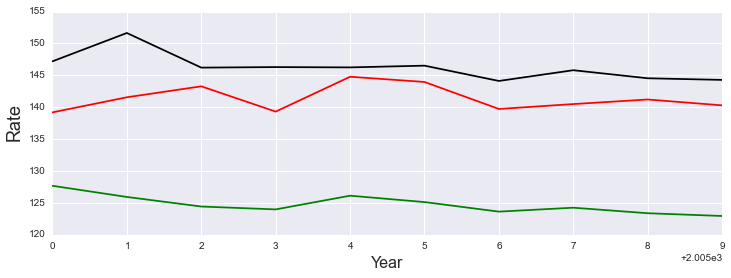

In [249]:
fig, ax = fig, ax = plt.subplots(figsize=(12,4))

ax.plot(df_top100.Year, df_top100.MeanofRate, color="black")
ax.plot(df_top100.Year, df_top100.MaxRateofMale, color="green")
ax.plot(df_top100.Year, df_top100.MaxRateofFemale, color="red")

ax.set_xlabel("Year", fontsize=16)
ax.set_ylabel("Rate", fontsize=18)
ax.legend();


In [267]:
nationality = df_top100.NationalityCounts
nationality[2005]


DEU    20
AUS    10
KEN    10
FRA     9
GBR     7
DNK     6
ETH     5
JPN     4
ESP     4
ISR     4
CHE     3
ITA     3
BEL     2
FIN     2
USA     2
ZAF     1
EST     1
KOR     1
NOR     1
SWE     1
NLD     1
AUT     1
HUN     1
BRA     1
Name: nationality, dtype: int64

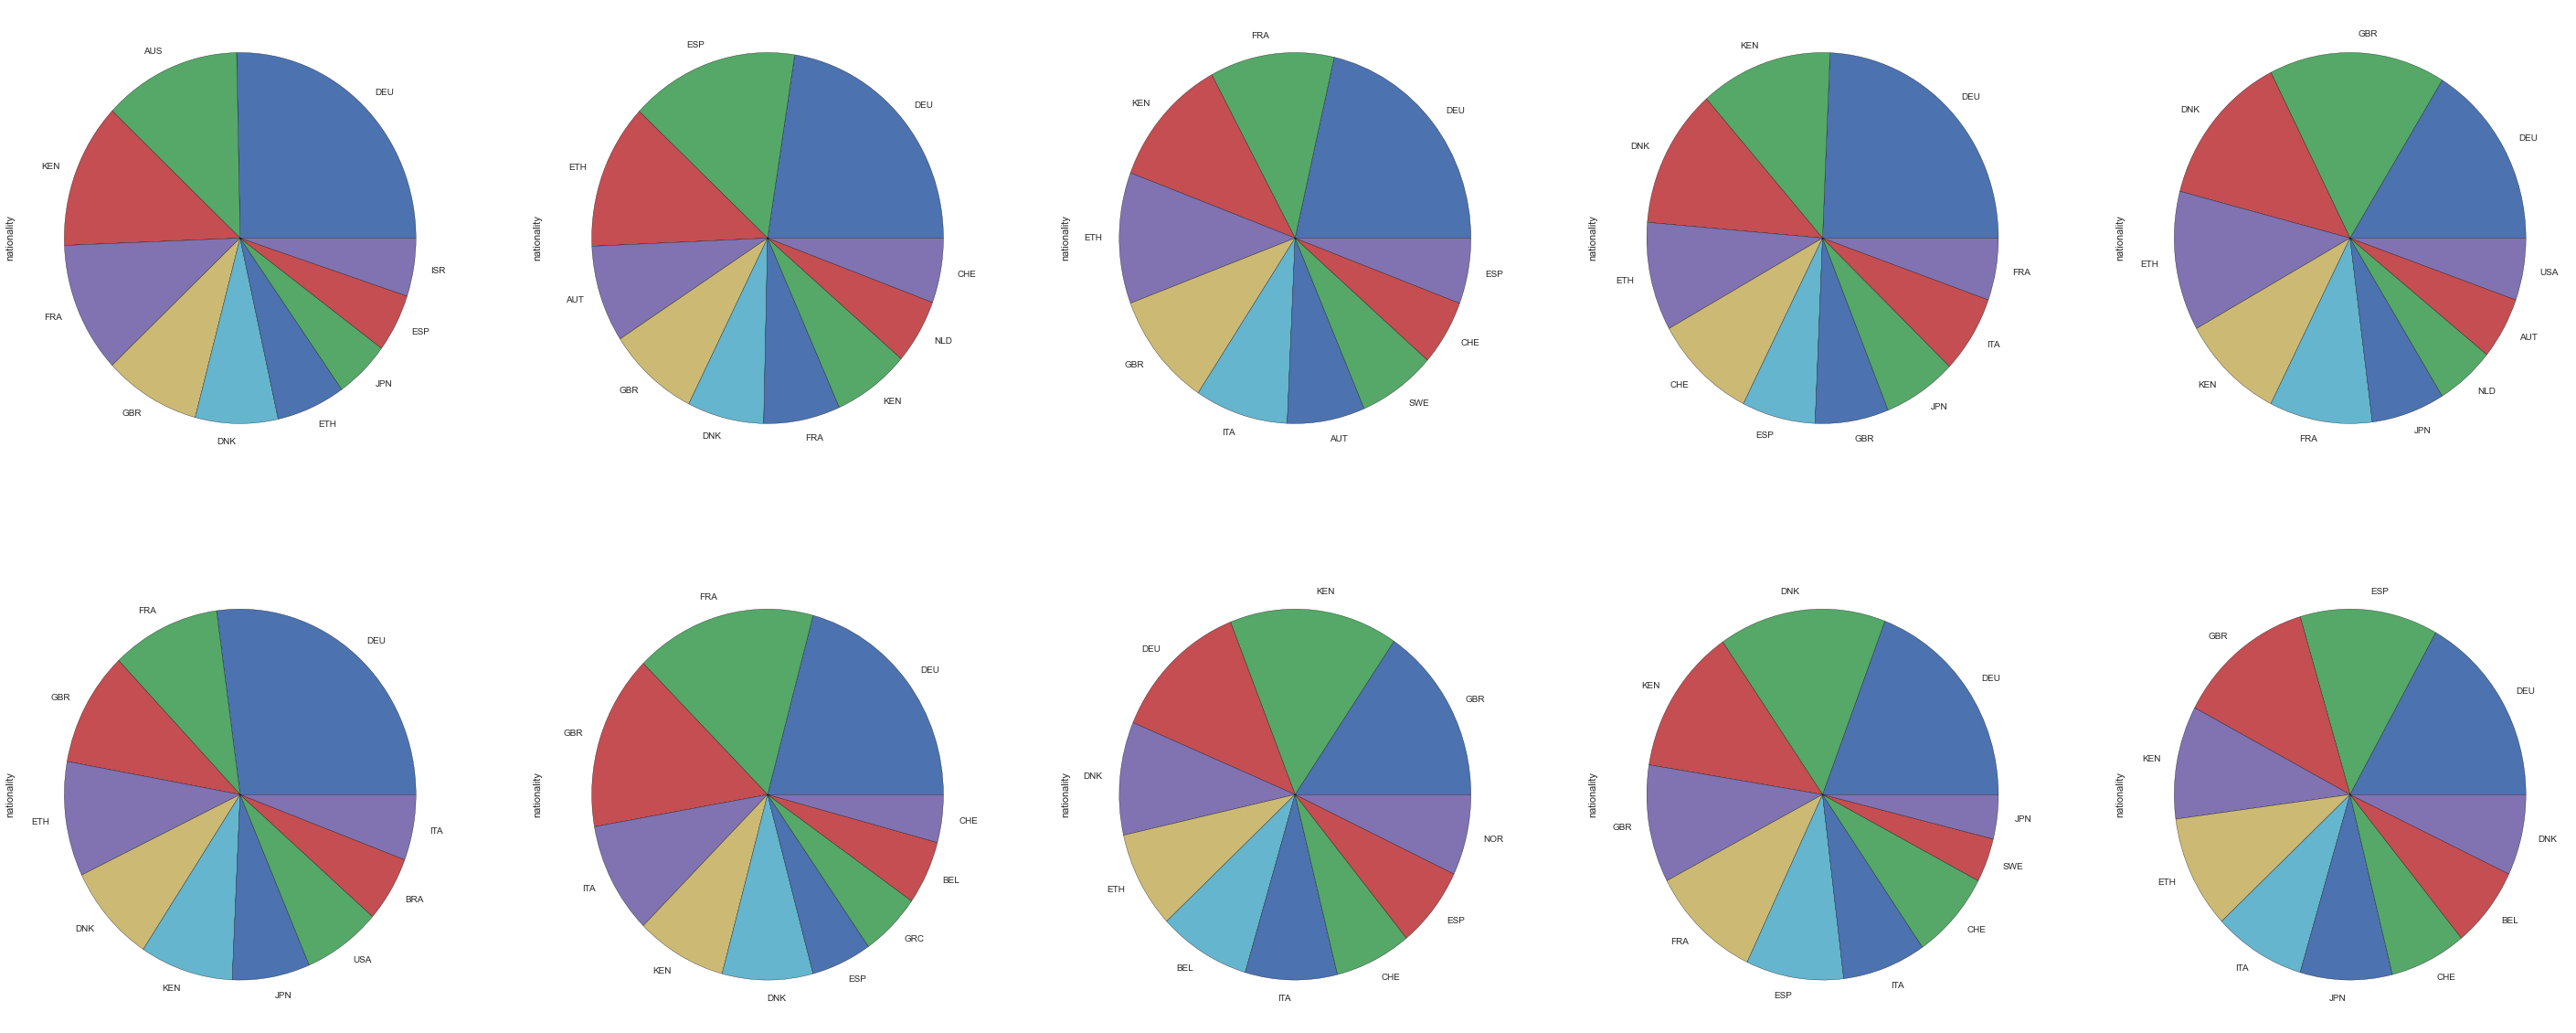

In [280]:
fig, axes = plt.subplots(2, 5, figsize=(50, 20))

j = 0
i = 2005

while j <= 9 and i < 2015:
    if j <=4:
        nationality[i].head(10).plot(ax=axes[0,j], kind="pie")
        j += 1
        i += 1
    else:
        nationality[i].head(10).plot(ax=axes[1,j-5], kind="pie")
        j += 1
        i += 1

### 分析
- 国家代码:
    - DEU: 	Germany
    - AUS: Australia
    - KEN: Kenya
    - FRA: France
    - ETH: Ethiopia

- Berlin果然是德国的主场啊
- Kenya是包揽前五名的...


In [281]:
ageClass = df_top100.AgeClassCounts

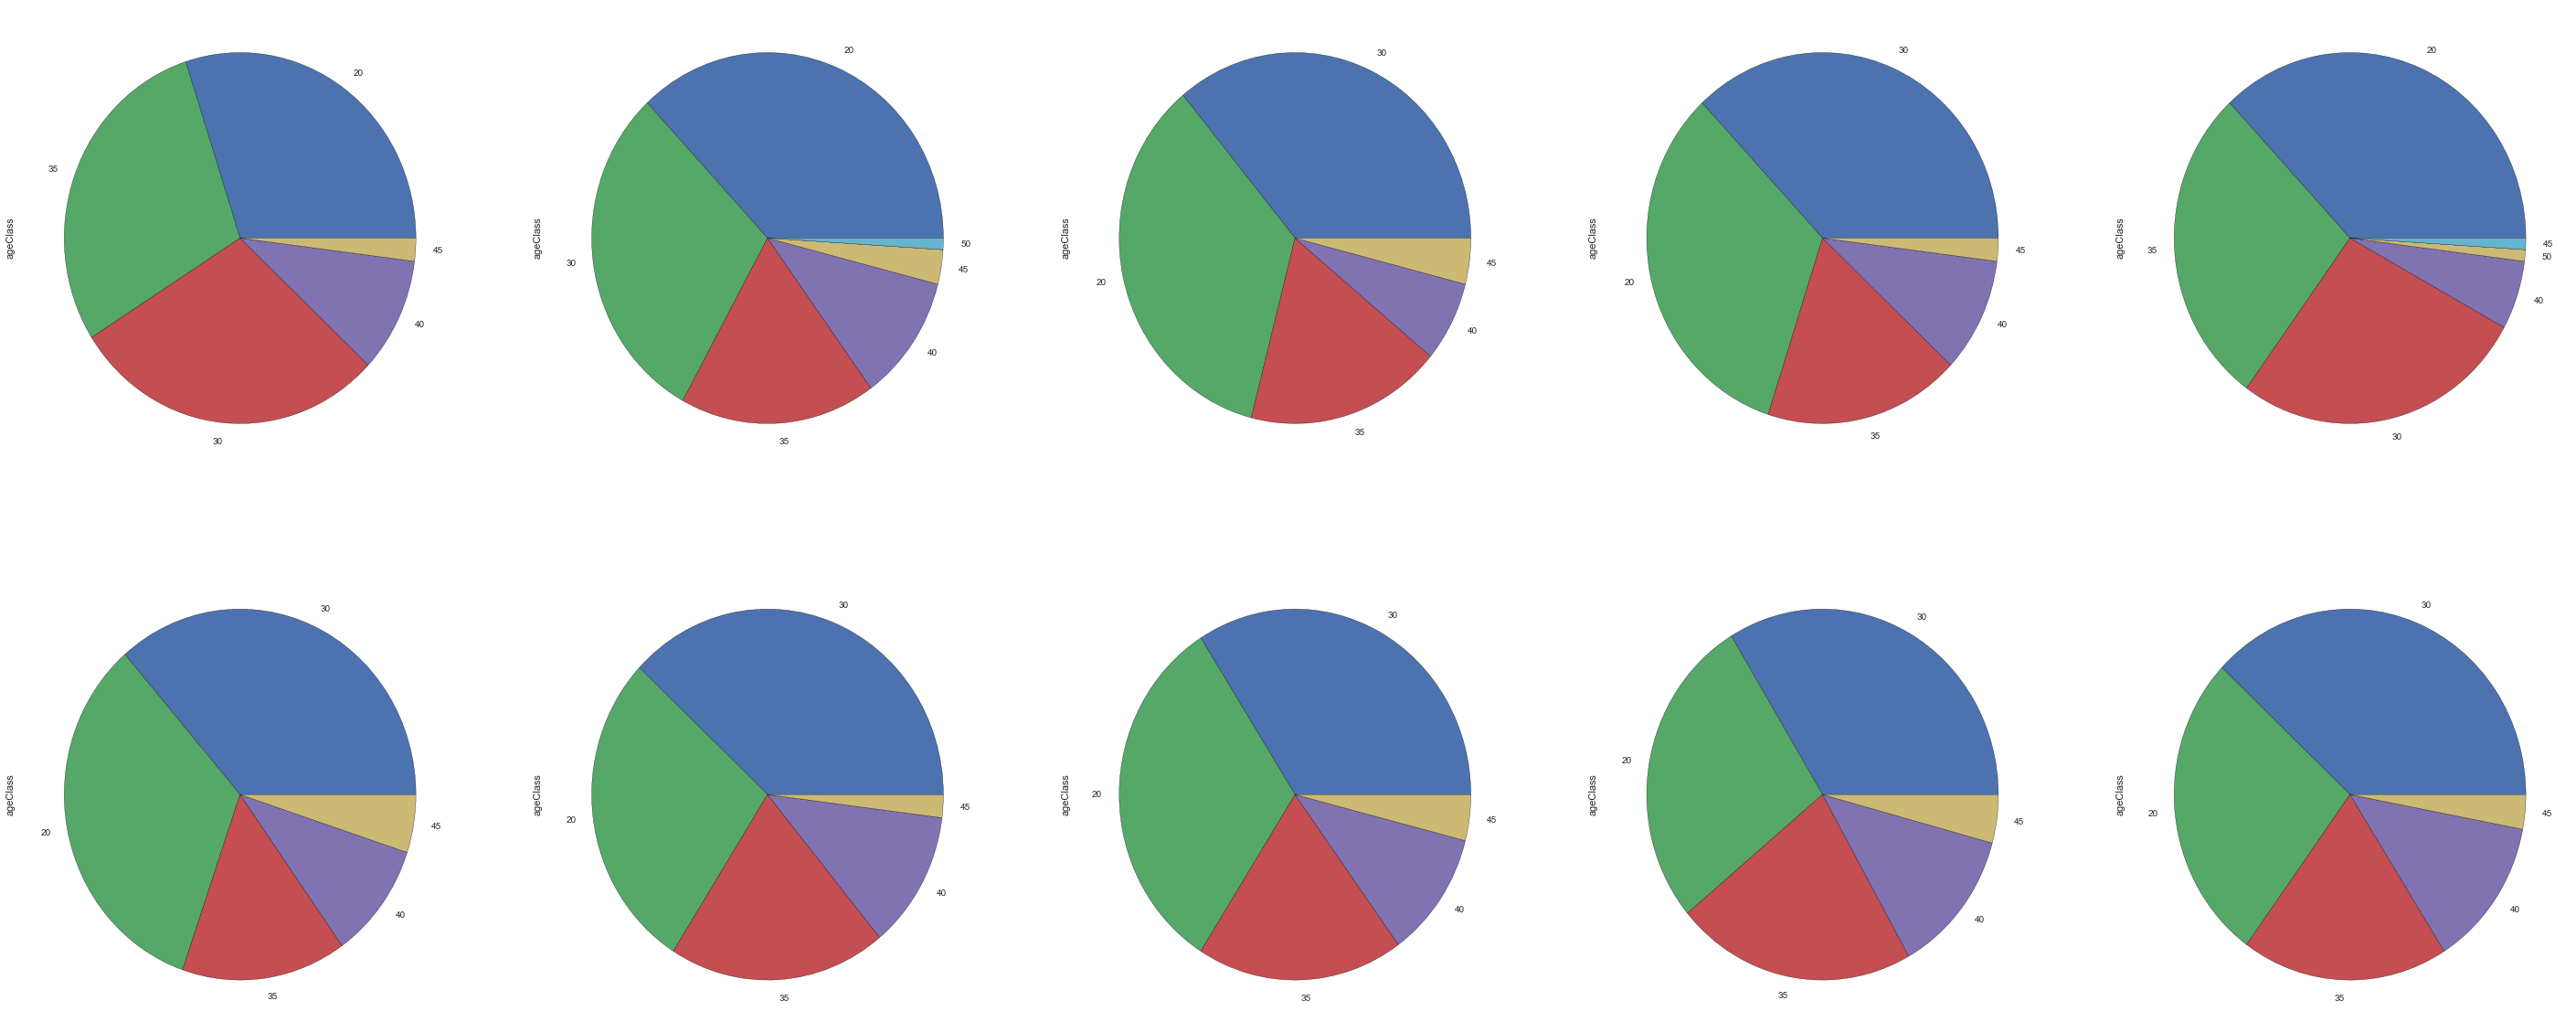

In [282]:
fig, axes = plt.subplots(2, 5, figsize=(50, 20))

j = 0
i = 2005

while j <= 9 and i < 2015:
    if j <=4:
        ageClass[i].head(10).plot(ax=axes[0,j], kind="pie")
        j += 1
        i += 1
    else:
        ageClass[i].head(10).plot(ax=axes[1,j-5], kind="pie")
        j += 1
        i += 1

### 分析
- 虽然运动的黄金年龄是在20-35, 但是可以看到年龄大的选手在马拉松比赛中还是有自己的一席之地.





## Top5跑者

In [283]:
df_top5 = frame[frame.yearOfRun == 2005].head(5)

In [284]:
for i in range(2005,2015):
    pd.con

,place,netTime,clockTime,yob,ageClass,acPlace,sex,nationality,name,yearOfRun
0,1,7661,7661,1978,20,1,M,KEN,354658649da56c20c72b6689d2b7e1b8cc334ac9,2005
1,2,7738,7738,1976,20,2,M,KEN,1da607e762ac07eba6f9b5a717e9ff196d987242,2005
2,3,7747,7747,1978,20,3,M,KEN,1de4a95cef28c290ba5790217288f510afc3b26b,2005
3,4,7750,7750,1973,30,1,M,KEN,12215d93d2cb5b0234991a64d097955338a73dd3,2005
4,5,7810,7810,1975,30,2,M,KEN,5375986567be20b49067956e989884908fb807f6,2005


In [285]:
df_top5 = pd.DataFrame()
list_ = []
for i in range(2005,2015):
    df = frame[frame.yearOfRun == i].head(5)
    list_.append(df)
df_top5 = pd.concat(list_)

In [287]:
df_top5_nationality_counits = df_top5.nationality.value_counts()

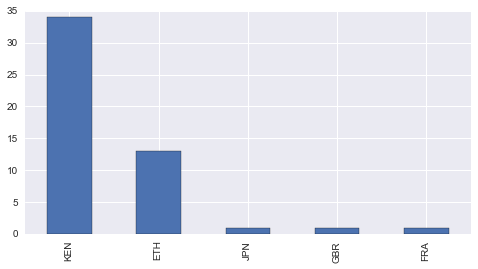

In [291]:
fig, ax = plt.subplots(figsize=(8,4))

df_top5_nationality_counits.plot(ax=ax, kind="bar")

## 全部跑者

In [318]:
df_all = pd.DataFrame({"AgeClass":"", "Rate": "", "Nationality": "", "Male":"", "Female":"", "Number":""}, 
                      index = np.arange(2005, 2015))

In [319]:
df = frame

In [321]:
for i in range(2005, 2015):
    df_all.Male[i] = df[df.yearOfRun == i].sex.value_counts()[0]
    df_all.Female[i] = df[df.yearOfRun == i].sex.value_counts()[1]
    df_all.AgeClass[i] = df[df.yearOfRun == i].ageClass.value_counts()
    df_all.Nationality[i] = df[df.yearOfRun == i].nationality.value_counts()
    df_all.Number[i] = df[df.yearOfRun == i].describe().yearOfRun.values[0]
    df_all.Rate[i] = df[df.yearOfRun == i].netTime.mean()/60

In [322]:
df_all

,AgeClass,Female,Male,Nationality,Number,Rate
2005,40 6744 35 5718 45 4845 30 385...,5872,24501,DEU 20909 DNK 1873 NLD 906 GBR ...,30373,250.844
2006,40 6773 35 5390 45 5207 30 345...,6088,24094,DEU 19264 DNK 2389 GBR 976 FRA ...,30182,256.201
2007,40 7128 45 5576 35 5517 30 392...,6492,25994,DEU 18530 DNK 3106 GBR 1469 FRA ...,32486,246.941
2008,40 7696 45 6462 35 5658 30 413...,7405,28326,DEU 18712 DNK 3872 GBR 2122 FRA ...,35731,247.017
2009,40 7275 45 6289 35 5481 30 435...,7066,27949,DEU 16775 DNK 4442 GBR 2148 ITA ...,35015,252.833
2010,40 6971 45 6357 35 5207 50 418...,7397,26604,DEU 14225 DNK 4285 FRA 2612 GBR ...,34001,245.779
2011,40 6555 45 6270 35 4772 50 427...,7383,25531,DEU 13094 DNK 4156 FRA 2269 GBR ...,32914,249.958
2012,40 6632 45 6527 35 5122 50 456...,7868,26402,DEU 13493 DNK 4283 GBR 2412 FRA ...,34270,246.504
2013,45 6998 40 6946 35 5222 50 504...,8947,27528,DEU 14779 DNK 5089 GBR 1927 FRA ...,36475,245.311
2014,40 5440 45 5425 35 4199 50 397...,6768,22177,DEU 11289 DNK 2612 GBR 2109 FRA ...,28945,247.828


In [328]:
ageClass = df_all.AgeClass

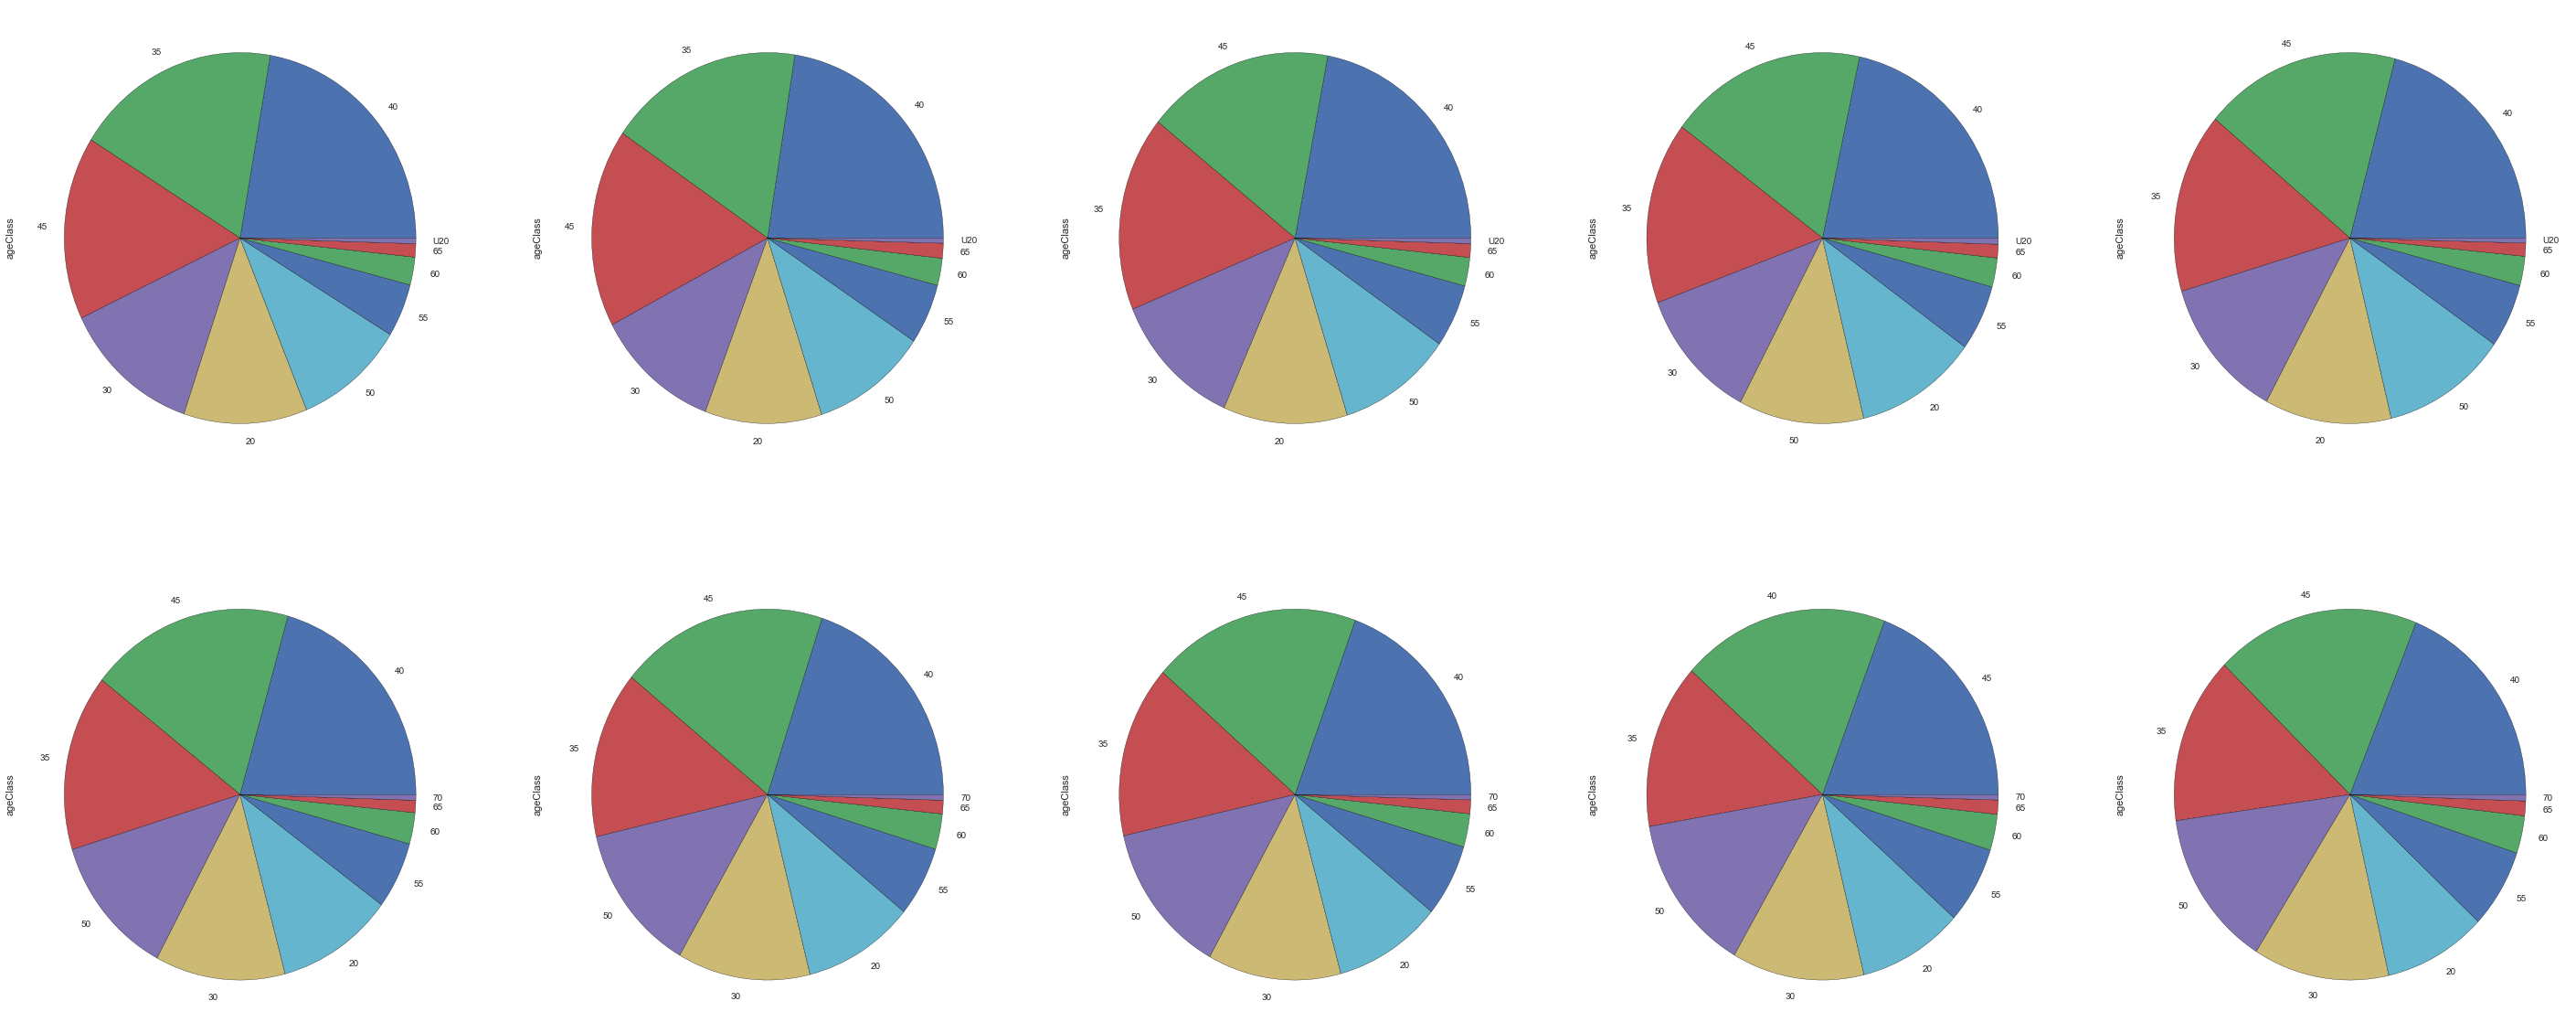

In [329]:
fig, axes = plt.subplots(2, 5, figsize=(50, 20))

j = 0
i = 2005

while j <= 9 and i < 2015:
    if j <=4:
        ageClass[i].head(10).plot(ax=axes[0,j], kind="pie")
        j += 1
        i += 1
    else:
        ageClass[i].head(10).plot(ax=axes[1,j-5], kind="pie")
        j += 1
        i += 1

## 分析
- 可以到年龄在30-45岁之间的跑者占据了半壁江山.
- 比较意外的是50岁的跑者竟然非常多.
- 然而马拉松在年轻人群里参与度相比中年人要少很多, 可能年轻人对耐力项目感到乏味无聊有关?

In [330]:
nationality = df_all.Nationality

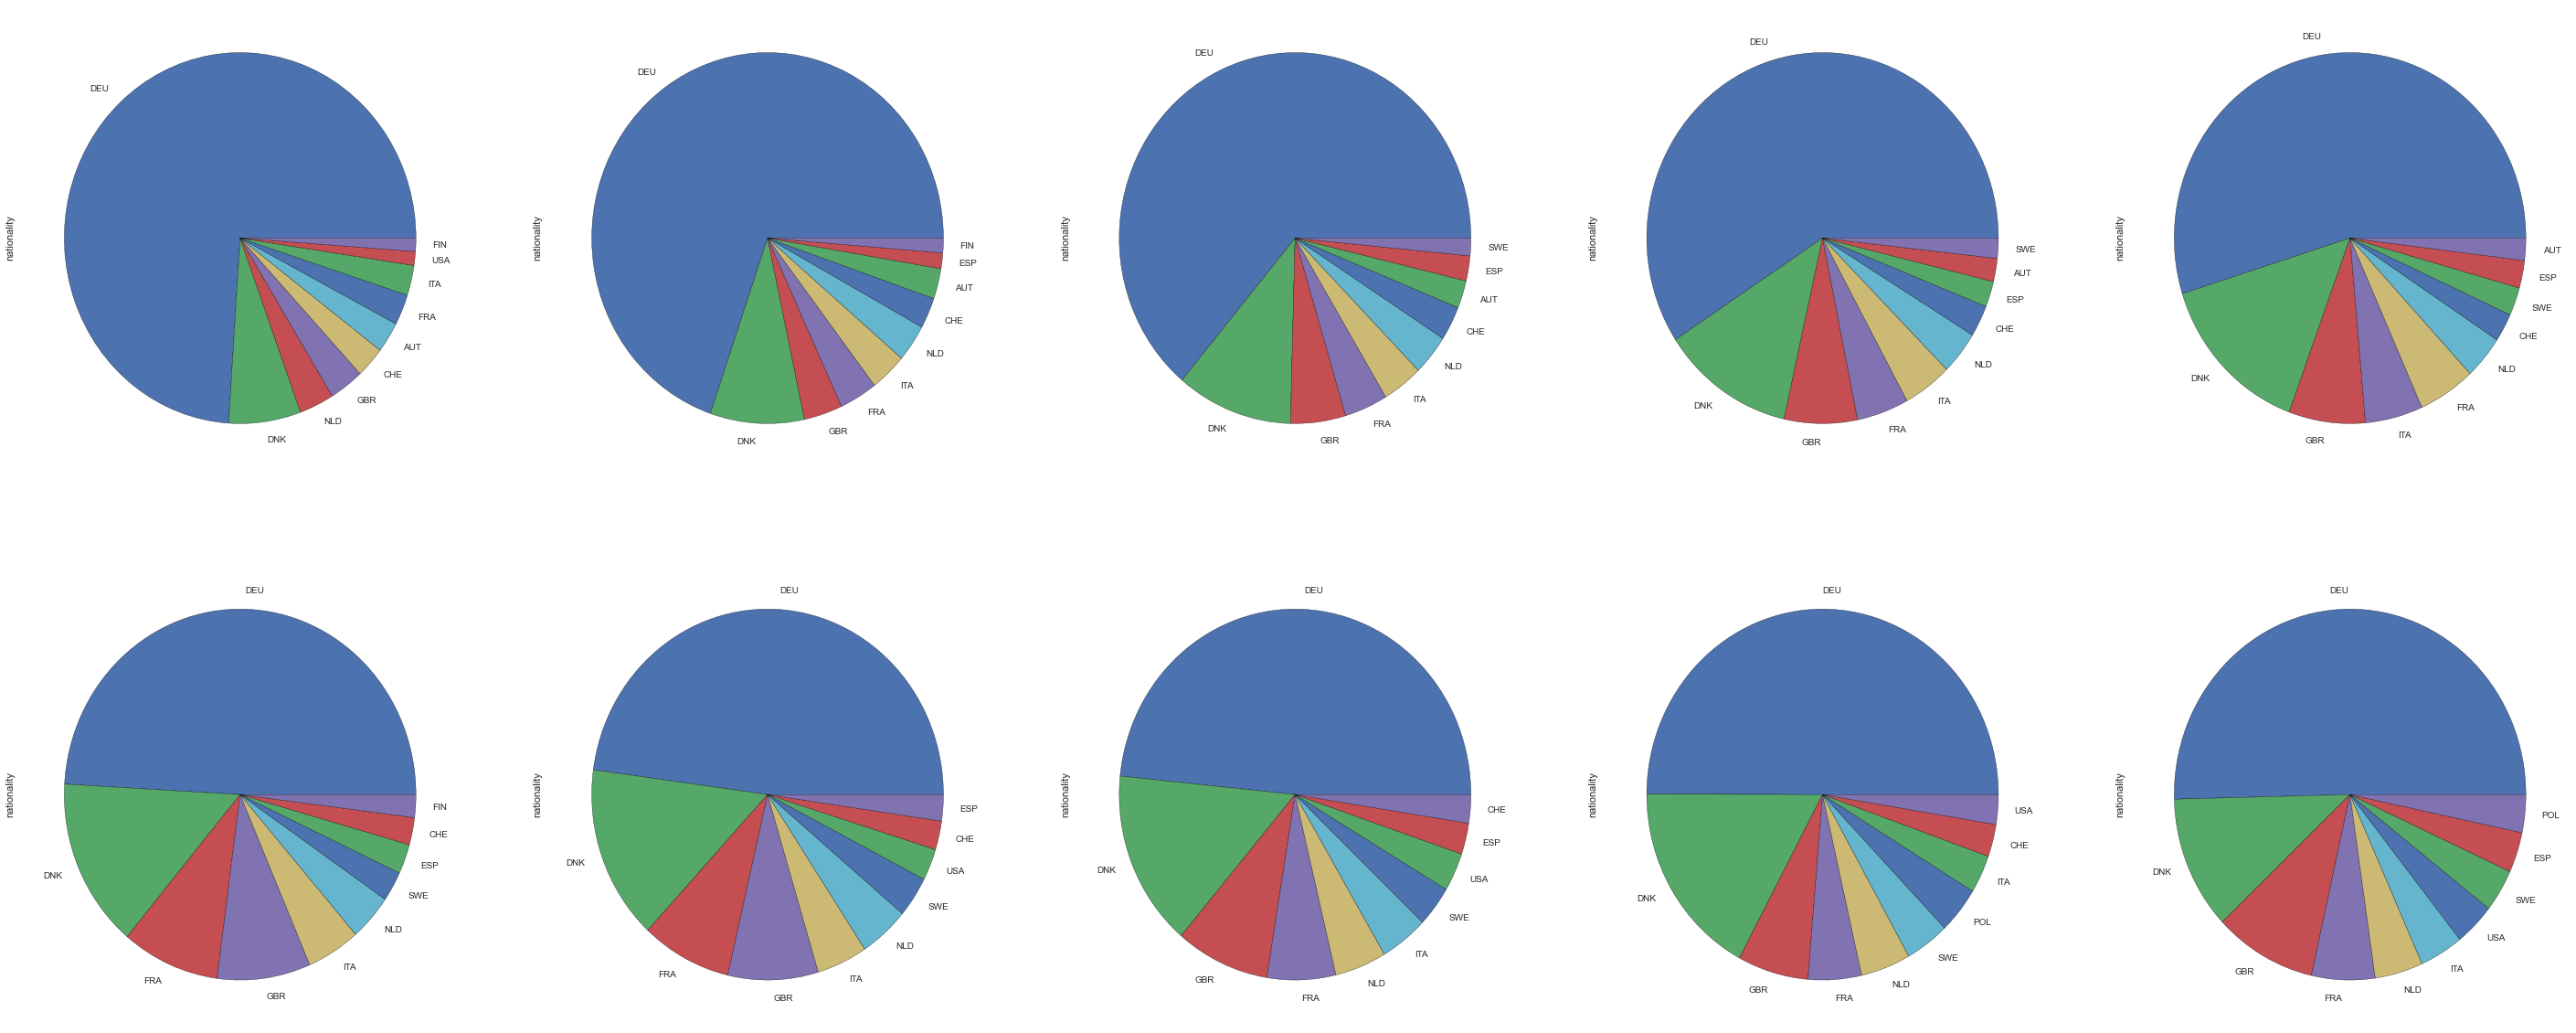

In [331]:
fig, axes = plt.subplots(2, 5, figsize=(50, 20))

j = 0
i = 2005

while j <= 9 and i < 2015:
    if j <=4:
        nationality[i].head(10).plot(ax=axes[0,j], kind="pie")
        j += 1
        i += 1
    else:
        nationality[i].head(10).plot(ax=axes[1,j-5], kind="pie")
        j += 1
        i += 1

## 分析
- 其实从这饼图可以看到, 德国的参与人数的逐年下降, 我不清楚这是有意控制的结果还是马拉松在德国的欢迎程度在下降, 亦或者是对世界各地的跑者吸引程度更高了?
- 

## 完赛时间

### 2014年完赛时间分布

In [338]:
df_2014 = frame[frame.yearOfRun == 2014]

In [340]:
df_2014_finish_time = df_2014.netTime

In [342]:
df_2014_finish_time = df_2014_finish_time/60

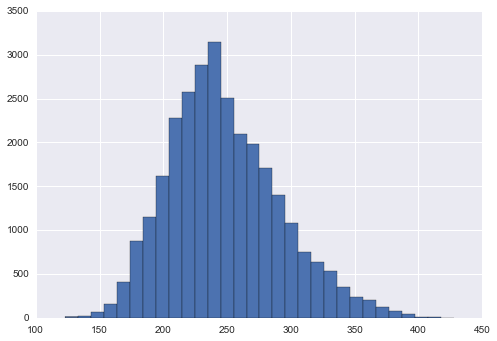

In [347]:
plt.hist(df_2014_finish_time, bins=30);

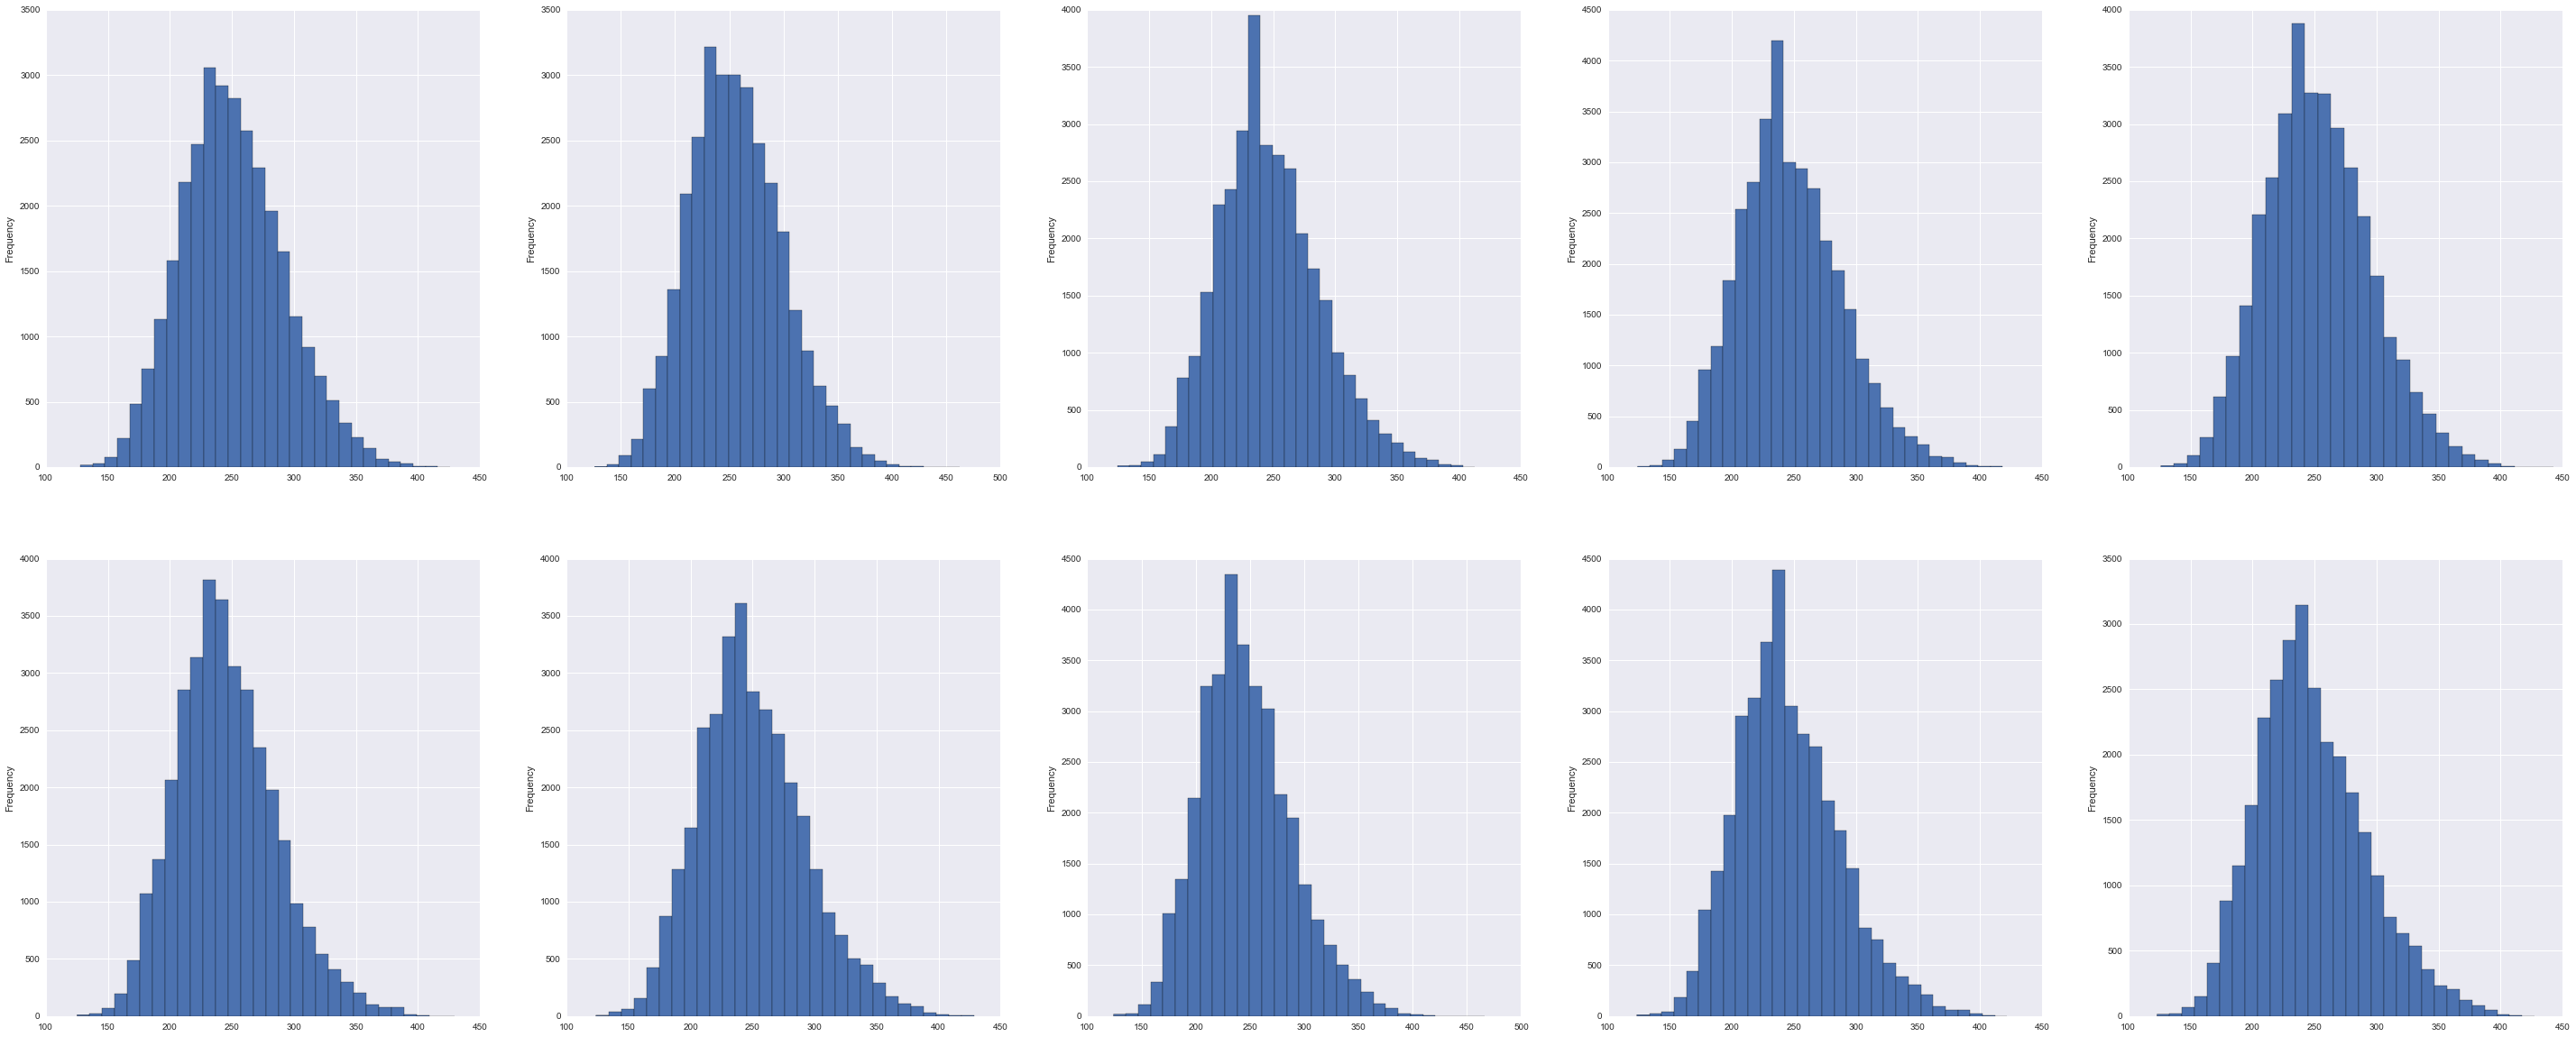

In [351]:
fig, axes = plt.subplots(2, 5, figsize=(50, 20))

j = 0
i = 2005

while j <= 9 and i < 2015:
    if j <=4:
        (frame[frame.yearOfRun == i].netTime/60).plot(ax=axes[0,j], kind="hist", bins = 30)
        j += 1
        i += 1
    else:
        (frame[frame.yearOfRun == i].netTime/60).plot(ax=axes[1,j-5], kind="hist", bins = 30)
        j += 1
        i += 1
    

## 分析
- 中等水平基本在4小时左右完赛的选手
    - 这也为大家提供的一个训练的目标, 达到4小时, 你就是中等马拉松选手了.

## 假设检验
- 先假设其符合正态分布
    - mu = 247.82776587781703
    - sigma = 40


In [442]:
mu = 247.82776587781703
sigma = 40

In [443]:
df_2014_finish_time_mean = df_2014_finish_time.mean()

In [444]:
df_2014_finish_time_mean

247.82776587781703

In [445]:
t, p = stats.ttest_1samp(df_2014_finish_time, mu)

In [446]:
t

-1.0967067301587648e-11

In [447]:
p

0.99999999999124967

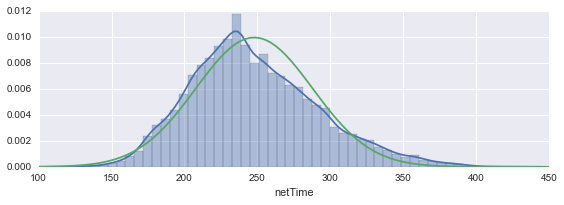

In [448]:
fig, ax = plt.subplots(figsize=(8, 3))

sns.distplot(df_2014_finish_time, ax=ax)
x = np.linspace(100,450, num=100)
ax.plot(x, stats.norm(loc=mu, scale=sigma).pdf(x))

fig.tight_layout()

## 分析
- 可以看到p值......
- 其严重符合正态分布.

## 预测

### 运用线性回归预测下一年的马拉松完赛成绩的均值

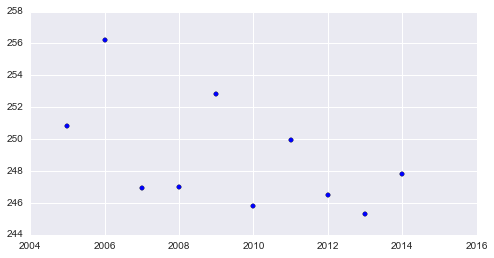

In [450]:
fig , ax = plt.subplots(figsize=(8,4))

ax.scatter(df_all.index, df_all.Rate);

- 可以大致看到, 完赛均值随着时间越来越少.

In [458]:
df_all["Year"] = np.arange(2005,2015)

In [531]:
data1 = pd.DataFrame({"Year":np.arange(2005.0,2015.0,1.0), "Rate":df_all.Rate.apply(lambda x: float(x))})

In [532]:
data1 = data1.set_index(np.arange(0,10))

In [565]:
X1 = data1.Year.values.reshape(10,1)

In [574]:
X2 = np.ones(10)

In [584]:
X= np.vstack([np.ones(10), X1.T]).T

In [585]:
Y = data1.Rate.values.reshape(10,1)

In [587]:
model = sm.OLS(Y, X)
result = model.fit()

In [588]:
result.params

array([  1.51298675e+03,  -6.29044637e-01])

In [589]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.295
Model:                            OLS   Adj. R-squared:                  0.207
Method:                 Least Squares   F-statistic:                     3.352
Date:                Sun, 27 Mar 2016   Prob (F-statistic):              0.105
Time:                        18:21:53   Log-Likelihood:                -24.455
No. Observations:                  10   AIC:                             52.91
Df Residuals:                       8   BIC:                             53.51
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const       1512.9868    690.443      2.191      0.0

In [590]:
x = np.linspace(2005, 2016, 1000)

In [591]:
y = x*result.params[1]+result.params[0]

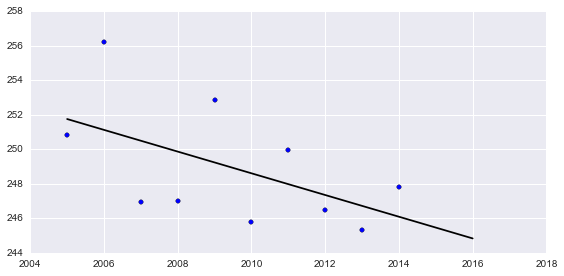

In [592]:
fig, ax = plt.subplots(figsize=(8, 4))

ax.scatter(df_all.index, df_all.Rate)
ax.plot(x, y, color="black")


fig.tight_layout()

## 分析
- 未来几年内Berlin Marathon的平均完赛成绩在4小时开外.